<a href="https://colab.research.google.com/github/prabhat-parth/NN_Computing_Classification/blob/main/NN_classifier_for_HDAC1_ML_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/HDAC1_ML_66.csv")
data.head()
data.shape

(66, 2327)

In [ ]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))

No of duplicates in DATA: 0


In [ ]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))

We have 0 NaN/Null values in data


In [ ]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))

No of duplicates in DATA: 0


In [ ]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))

We have 0 NaN/Null values in data


In [ ]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))
data.shape

We have 0 NaN/Null values in data


(66, 2327)

In [ ]:
data

,Name,BA(8/1),nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,12,0,0,-4.2917,18.418689,58.0442,81.318962,18,19,71,37,34,0,29,4,4,0,0,0,0,0,0,0,6026.861885,6419.398667,8675.312902,9256.353495,8748.271320,9078.934070,8539.655702,7746.969158,7383.021349,15177.657260,19075.168640,26920.98266,29984.87233,29186.12355,29260.83694,28129.015360,26039.691120,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,0,0,-1.7780,3.161284,46.1328,51.726653,10,11,44,23,21,0,17,3,2,1,0,0,0,0,0,0,4602.195150,4221.273091,5564.932977,6022.684988,5039.229249,4628.502218,4080.302679,3571.429032,3127.503814,9612.047273,11762.402660,16185.29947,17288.37869,15890.78093,14748.52625,13201.092220,11840.281330,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,14,0,0,-3.3692,11.351509,77.8487,54.962997,0,0,52,23,29,0,17,3,3,0,0,0,0,0,0,0,3838.448063,4263.267773,6304.005087,6187.426747,5139.235213,4369.798845,4000.637828,3305.276180,3003.098695,9480.330769,12851.083740,20416.68838,23389.15608,19367.08790,15269.52625,13327.242670,12298.250570,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,-1.4470,2.093809,48.2137,43.021860,6,6,40,20,20,0,13,4,3,0,0,0,0,0,0,0,3448.443052,3504.905244,4548.536117,4598.053184,3866.756331,3412.671777,3391.753453,2847.583682,2387.307040,7749.823635,9393.350119,12799.29970,14232.31468,13042.90552,11037.11156,9252.556169,8393.357913,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16,0,0,-4.0677,16.546183,52.2499,52.969411,6,6,50,23,27,0,16,4,3,0,0,0,0,0,0,0,3888.347863,4024.459191,5185.933012,5212.582907,4585.082759,4061.445804,3595.858222,3400.157457,3430.706305,9237.960551,11439.286700,15837.18525,17560.57541,16374.79903,14296.15109,12093.517370,11265.062920,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,90,1,0,-1.1777,1.386977,38.2640,52.250860,12,12,46,26,20,0,19,2,2,0,0,3,0,0,0,3,4748.485651,4764.987652,7484.417513,7671.749561,7409.236657,6831.694727,6384.162826,6435.883029,6515.341368,10119.037940,12890.999020,19433.21139,22921.08925,23488.32999,23123.00113,21516.136050,18487.137300,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62,92,1,0,-0.7196,0.517824,50.9562,61.860997,12,12,55,26,29,0,22,2,2,0,0,0,0,0,0,0,4107.604618,4622.174344,6700.723172,7495.086738,7108.783955,6773.874549,6259.638670,5978.322144,5732.282935,11138.210330,14372.698800,21934.08356,26917.11837,27534.30940,26440.15660,23557.343240,20430.875340,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63,93,1,0,-2.2758,5.179266,31.8294,57.860239,16,17,49,26,23,0,22,2,2,0,0,0,0,0,0,0,4101.508234,4693.795937,6655.257332,7532.414324,7367.621410,7682.236316,7609.346143,6679.182136,4993.171361,10951.707860,14107.796010,21310.12001,25447.93446,26315.63404,27440.31918,27393.110940,24240.477930,...,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
data = data.drop(['Name'], axis = 1).copy()
data.shape

(66, 2326)

In [ ]:
data

,BA(8/1),nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,0,-4.2917,18.418689,58.0442,81.318962,18,19,71,37,34,0,29,4,4,0,0,0,0,0,0,0,6026.861885,6419.398667,8675.312902,9256.353495,8748.271320,9078.934070,8539.655702,7746.969158,7383.021349,15177.657260,19075.168640,26920.98266,29984.87233,29186.12355,29260.83694,28129.015360,26039.691120,25008.833430,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-1.7780,3.161284,46.1328,51.726653,10,11,44,23,21,0,17,3,2,1,0,0,0,0,0,0,4602.195150,4221.273091,5564.932977,6022.684988,5039.229249,4628.502218,4080.302679,3571.429032,3127.503814,9612.047273,11762.402660,16185.29947,17288.37869,15890.78093,14748.52625,13201.092220,11840.281330,10718.065800,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,-3.3692,11.351509,77.8487,54.962997,0,0,52,23,29,0,17,3,3,0,0,0,0,0,0,0,3838.448063,4263.267773,6304.005087,6187.426747,5139.235213,4369.798845,4000.637828,3305.276180,3003.098695,9480.330769,12851.083740,20416.68838,23389.15608,19367.08790,15269.52625,13327.242670,12298.250570,11647.806710,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,-1.4470,2.093809,48.2137,43.021860,6,6,40,20,20,0,13,4,3,0,0,0,0,0,0,0,3448.443052,3504.905244,4548.536117,4598.053184,3866.756331,3412.671777,3391.753453,2847.583682,2387.307040,7749.823635,9393.350119,12799.29970,14232.31468,13042.90552,11037.11156,9252.556169,8393.357913,7900.986906,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,-4.0677,16.546183,52.2499,52.969411,6,6,50,23,27,0,16,4,3,0,0,0,0,0,0,0,3888.347863,4024.459191,5185.933012,5212.582907,4585.082759,4061.445804,3595.858222,3400.157457,3430.706305,9237.960551,11439.286700,15837.18525,17560.57541,16374.79903,14296.15109,12093.517370,11265.062920,10924.710050,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,0,-1.1777,1.386977,38.2640,52.250860,12,12,46,26,20,0,19,2,2,0,0,3,0,0,0,3,4748.485651,4764.987652,7484.417513,7671.749561,7409.236657,6831.694727,6384.162826,6435.883029,6515.341368,10119.037940,12890.999020,19433.21139,22921.08925,23488.32999,23123.00113,21516.136050,18487.137300,14954.390370,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62,1,0,-0.7196,0.517824,50.9562,61.860997,12,12,55,26,29,0,22,2,2,0,0,0,0,0,0,0,4107.604618,4622.174344,6700.723172,7495.086738,7108.783955,6773.874549,6259.638670,5978.322144,5732.282935,11138.210330,14372.698800,21934.08356,26917.11837,27534.30940,26440.15660,23557.343240,20430.875340,18967.409510,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63,1,0,-2.2758,5.179266,31.8294,57.860239,16,17,49,26,23,0,22,2,2,0,0,0,0,0,0,0,4101.508234,4693.795937,6655.257332,7532.414324,7367.621410,7682.236316,7609.346143,6679.182136,4993.171361,10951.707860,14107.796010,21310.12001,25447.93446,26315.6340

In [ ]:
data['BA(8/1)'].value_counts()

0    51
1    15
Name: BA(8/1), dtype: int64

In [ ]:
data  = data.astype('float')

In [ ]:
gt= data['BA(8/1)'].value_counts().index
gt

Float64Index([0.0, 1.0], dtype='float64')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Activity'] = label.fit_transform(data['BA(8/1)'])
data.head()

,BA(8/1),nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,0.0,0.0,-4.2917,18.418689,58.0442,81.318962,18.0,19.0,71.0,37.0,34.0,0.0,29.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6026.861885,6419.398667,8675.312902,9256.353495,8748.271320,9078.934070,8539.655702,7746.969158,7383.021349,15177.657260,19075.168640,26920.98266,29984.87233,29186.12355,29260.83694,28129.015360,26039.691120,25008.833430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,-1.7780,3.161284,46.1328,51.726653,10.0,11.0,44.0,23.0,21.0,0.0,17.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4602.195150,4221.273091,5564.932977,6022.684988,5039.229249,4628.502218,4080.302679,3571.429032,3127.503814,9612.047273,11762.402660,16185.29947,17288.37869,15890.78093,14748.52625,13201.092220,11840.281330,10718.065800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,-3.3692,11.351509,77.8487,54.962997,0.0,0.0,52.0,23.0,29.0,0.0,17.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3838.448063,4263.267773,6304.005087,6187.426747,5139.235213,4369.798845,4000.637828,3305.276180,3003.098695,9480.330769,12851.083740,20416.68838,23389.15608,19367.08790,15269.52625,13327.242670,12298.250570,11647.806710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,-1.4470,2.093809,48.2137,43.021860,6.0,6.0,40.0,20.0,20.0,0.0,13.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3448.443052,3504.905244,4548.536117,4598.053184,3866.756331,3412.671777,3391.753453,2847.583682,2387.307040,7749.823635,9393.350119,12799.29970,14232.31468,13042.90552,11037.11156,9252.556169,8393.357913,7900.986906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,-4.0677,16.546183,52.2499,52.969411,6.0,6.0,50.0,23.0,27.0,0.0,16.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3888.347863,4024.459191,5185.933012,5212.582907,4585.082759,4061.445804,3595.858222,3400.157457,3430.706305,9237.960551,11439.286700,15837.18525,17560.57541,16374.79903,14296.15109,12093.517370,11265.062920,10924.710050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df = data.fillna(data.mean())

In [ ]:
#library addition
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_validate, cross_val_predict

In [ ]:
#determine the number of classes(labels)
label_encoder = LabelEncoder().fit(df.Activity)
labels = label_encoder.transform(df.Activity)
classes = list(label_encoder.classes_)

In [ ]:
#split train data into validation and train
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(df, labels, test_size=0.2)

In [ ]:
trainX.shape, testX.shape

((52, 2327), (14, 2327))

In [ ]:
#wrist_X_train.to_csv('TrainData.csv')
#wrist_X_test.to_csv('TestData.csv')

In [ ]:
trainX

,BA(8/1),nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
10,0.0,0.0,-1.5834,2.507156,60.5872,52.633825,6.0,6.0,47.0,22.0,25.0,0.0,16.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4461.995285,4005.147157,5128.587038,5626.489329,4560.543109,3853.188113,3578.354076,3569.874824,3148.869333,9312.865349,11271.808800,15341.34442,16933.61551,15843.739830,13946.377760,12097.537010,11261.018820,10435.754550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
62,1.0,0.0,-0.7196,0.517824,50.9562,61.860997,12.0,12.0,55.0,26.0,29.0,0.0,22.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4107.604618,4622.174344,6700.723172,7495.086738,7108.783955,6773.874549,6259.638670,5978.322144,5732.282935,11138.210330,14372.698800,21934.08356,26917.11837,27534.309400,26440.156600,23557.343240,20430.875340,18967.409510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11,0.0,0.0,-1.0074,1.014855,54.7640,46.446653,6.0,6.0,41.0,20.0,21.0,0.0,14.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4169.402787,3668.190563,4741.169964,5232.975871,4171.013667,3455.650719,3237.692802,3212.163398,2861.747644,8341.496568,9965.828531,13514.25019,14920.01882,13854.953450,11988.321950,10054.752380,9086.048997,8392.946002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
47,0.0,0.0,-2.7875,7.770156,45.8026,66.389411,17.0,18.0,58.0,31.0,27.0,0.0,23.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5094.392759,5518.992409,7338.961762,7280.724656,6989.464474,6900.891830,6199.889274,5656.344635,5208.340964,12445.893040,15574.604180,21884.27741,23417.10402,22518.550750,21844.373700,20444.691350,18727.398020,17312.699440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
56,1.0,0.0,-2.2758,5.179266,31.8294,49.486653,12.0,12.0,43.0,22.0,21.0,0.0,18.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3522.419622,3948.261156,5452.716012,6016.114522,5770.856308,5900.065889,5402.226285,4355.811338,3135.529095,9195.472765,11760.738270,17463.03833,20493.26200,20924.182060,21547.639420,20068.178220,15501.680080,9792.532516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
57,1.0,0.0,-2.3276,5.417722,39.1452,53.382239,12.0,12.0,47.0,24.0,23.0,0.0,19.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3924.683872,4356.803310,6008.523103,6731.299686,6531.465984,6699.697825,6549.971911,5825.531970,4372.233637,9897.547932,12595.670500,18601.83313,22162.35120,23116.024460,23816.676420,22626.751100,19108.716120,14211.938920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,-1.7780,3.161284,46.1328,51.726653,10.0,11.0,44.0,23.0,21.0,0.0,17.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4602.195150,4221.273091,5564.932977,6022.684988,5039.229249,4628.502218,4080.302679,3571.429032,3127.503814,9612.047273,11762.402660,16185.29947,17288

In [ ]:
Xtrain = trainX.iloc[:,1:]
Xtrain

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0e,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
10,0.0,-1.5834,2.507156,60.5872,52.633825,6.0,6.0,47.0,22.0,25.0,0.0,16.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4461.995285,4005.147157,5128.587038,5626.489329,4560.543109,3853.188113,3578.354076,3569.874824,3148.869333,9312.865349,11271.808800,15341.34442,16933.61551,15843.739830,13946.377760,12097.537010,11261.018820,10435.754550,354.662045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
62,0.0,-0.7196,0.517824,50.9562,61.860997,12.0,12.0,55.0,26.0,29.0,0.0,22.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4107.604618,4622.174344,6700.723172,7495.086738,7108.783955,6773.874549,6259.638670,5978.322144,5732.282935,11138.210330,14372.698800,21934.08356,26917.11837,27534.309400,26440.156600,23557.343240,20430.875340,18967.409510,407.833512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11,0.0,-1.0074,1.014855,54.7640,46.446653,6.0,6.0,41.0,20.0,21.0,0.0,14.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4169.402787,3668.190563,4741.169964,5232.975871,4171.013667,3455.650719,3237.692802,3212.163398,2861.747644,8341.496568,9965.828531,13514.25019,14920.01882,13854.953450,11988.321950,10054.752380,9086.048997,8392.946002,312.707157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
47,0.0,-2.7875,7.770156,45.8026,66.389411,17.0,18.0,58.0,31.0,27.0,0.0,23.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5094.392759,5518.992409,7338.961762,7280.724656,6989.464474,6900.891830,6199.889274,5656.344635,5208.340964,12445.893040,15574.604180,21884.27741,23417.10402,22518.550750,21844.373700,20444.691350,18727.398020,17312.699440,445.893724,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
56,0.0,-2.2758,5.179266,31.8294,49.486653,12.0,12.0,43.0,22.0,21.0,0.0,18.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3522.419622,3948.261156,5452.716012,6016.114522,5770.856308,5900.065889,5402.226285,4355.811338,3135.529095,9195.472765,11760.738270,17463.03833,20493.26200,20924.182060,21547.639420,20068.178220,15501.680080,9792.532516,323.923736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
57,0.0,-2.3276,5.417722,39.1452,53.382239,12.0,12.0,47.0,24.0,23.0,0.0,19.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3924.683872,4356.803310,6008.523103,6731.299686,6531.465984,6699.697825,6549.971911,5825.531970,4372.233637,9897.547932,12595.670500,18601.83313,22162.35120,23116.024460,23816.676420,22626.751100,19108.716120,14211.938920,358.252896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,-1.7780,3.161284,46.1328,51.726653,10.0,11.0,44.0,23.0,21.0,0.0,17.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4602.195150,4221.273091,5564.932977,6022.684988,5039.229249,4628.502218,4080.302679,3571.429032,3127.503814,9612.0

In [ ]:
Ytrain = trainX.iloc[:,0]
Ytrain

10    0.0
62    1.0
11    0.0
47    0.0
56    1.0
57    1.0
1     0.0
49    1.0
2     0.0
14    0.0
33    0.0
20    0.0
34    0.0
26    0.0
16    0.0
30    0.0
23    0.0
43    0.0
44    0.0
54    1.0
36    0.0
48    0.0
4     0.0
39    0.0
12    1.0
46    0.0
19    0.0
27    0.0
50    0.0
53    0.0
64    1.0
22    0.0
18    0.0
15    0.0
9     0.0
29    0.0
41    0.0
37    0.0
32    0.0
31    0.0
61    1.0
45    0.0
63    1.0
13    0.0
7     0.0
17    0.0
65    1.0
58    1.0
38    0.0
0     0.0
24    0.0
55    1.0
Name: BA(8/1), dtype: float64

In [ ]:
Xtest = testX.iloc[:,1:]
Xtest

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0e,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
60,0.0,-1.1777,1.386977,38.2640,52.250860,12.0,12.0,46.0,26.0,20.0,0.0,19.0,2.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,4748.485651,4764.987652,7484.417513,7671.749561,7530.302666,7635.114087,7539.749147,7735.623611,6491.923011,10119.037940,12890.999020,19433.21139,22921.08925,23713.45740,24123.28107,23276.185930,20663.537930,15310.684580,372.745788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
35,0.0,-3.6965,13.664112,55.6440,71.086997,17.0,19.0,63.0,34.0,29.0,0.0,24.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5752.625010,6079.838492,8217.341979,8542.468195,8457.528014,8424.875261,7813.872621,6791.399220,6384.012531,13364.358980,16767.607350,23842.98651,26140.27606,25536.98101,24582.50500,23119.371450,21251.677070,19969.748930,493.574600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.0,-5.4460,29.658916,56.3867,82.787755,18.0,19.0,73.0,38.0,35.0,0.0,29.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6283.845950,6629.701616,9061.673008,9696.133569,9029.181645,9310.467515,8812.502027,8217.731684,7944.785743,15425.131780,19432.141330,27588.60916,30952.74809,30113.50084,30001.02753,29054.718590,27150.207450,26108.739610,561.386328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
59,0.0,-2.0772,4.314760,43.4390,56.475825,12.0,12.0,50.0,25.0,25.0,0.0,20.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4070.980121,4525.281607,6246.111604,6917.934079,6667.155341,6686.478641,6227.132813,5626.655101,4935.889877,10383.232320,13248.660640,19427.31583,22903.67484,23940.73188,24736.83062,22754.830160,18347.547860,14277.004530,379.230340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
40,0.0,-2.3078,5.325941,46.6751,66.279618,17.0,18.0,58.0,32.0,26.0,0.0,23.0,5.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5454.316019,5735.075142,7771.127228,7617.001742,6931.105570,6645.828808,6004.896661,5751.381307,5749.024106,12591.853300,15733.694390,22202.45782,23512.70364,21749.50091,20326.53587,18859.810760,17688.862450,17280.291700,455.175260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
52,0.0,-2.4694,6.097936,28.6919,47.726653,12.0,12.0,42.0,21.0,21.0,0.0,17.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3378.155501,3659.732914,4697.326331,4699.574281,4192.054458,4560.282345,4730.028482,4762.880002,4209.916150,8771.955863,10913.704460,15305.45329,16560.24667,15501.98942,16314.11998,17229.780400,16216.750690,13264.020600,316.383220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
28,0.0,-3.7395,13.983860,44.1966,52.197446,11.0,12.0,47.0,25.0,22.0,0.0,17.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4283.499665,4452.527986,5913.133457,5883.953715,5278.381119,4554.190460,4428.167379,4111.865525,3569.026566,9722

In [ ]:
Ytest = testX.iloc[:,0]
Ytest

60    1.0
35    0.0
8     0.0
59    1.0
40    0.0
52    1.0
28    0.0
21    0.0
3     0.0
51    0.0
6     0.0
42    0.0
5     0.0
25    0.0
Name: BA(8/1), dtype: float64

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

Accuracy: 100.0000%
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
[[11  0]
 [ 0  3]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy: 92.8571%
Precision: 0.875000
Recall: 0.954545
F1 score: 0.904762
[[10  1]
 [ 0  3]]
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.75      1.00      0.86         3

    accuracy                           0.93        14
   macro avg       0.88      0.95      0.90        14
weighted avg       0.95      0.93      0.93        14

Accuracy: 14.2857%
Precision: 0.076923
Recall: 0.333333
F1 score: 0.125000
[[ 0 11]
 [ 1  2]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.15      0.67      0.25         3

    accuracy                           0.14        14
   macro avg       0.08      0.33      0.12        14
weighted avg       0.03      0.14      0.05        14



(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f554fedbc90>)

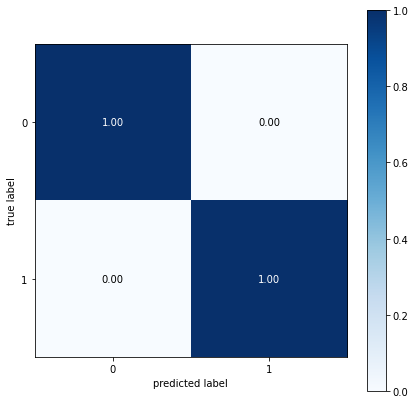

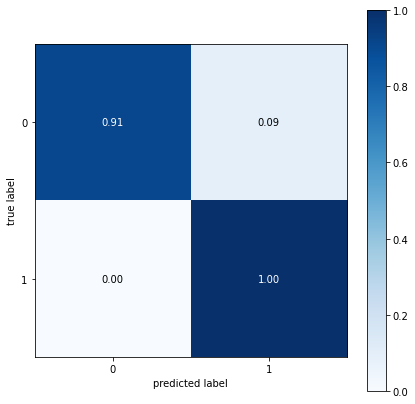

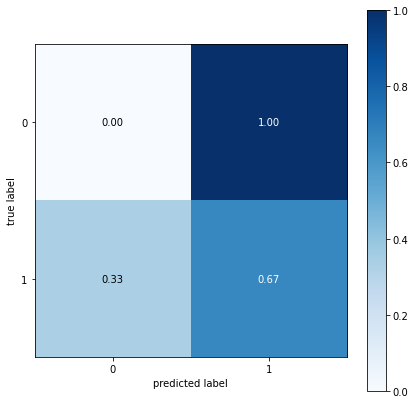

In [ ]:

NN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))



NN = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))

Accuracy: 100.0000%
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
[[11  0]
 [ 0  3]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Accuracy: 92.8571%
Precision: 0.958333
Recall: 0.833333
F1 score: 0.878261
[[11  0]
 [ 1  2]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      0.67      0.80         3

    accuracy                           0.93        14
   macro avg       0.96      0.83      0.88        14
weighted avg       0.93      0.93      0.92        14

Accuracy: 78.5714%
Precision: 0.392857
Recall: 0.500000
F1 score: 0.440000
[[11  0]
 [ 3  0]]
              precision    recall  f1-score   support

        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: 

Accuracy: 85.7143%
Precision: 0.923077
Recall: 0.666667
F1 score: 0.708333
[[11  0]
 [ 2  1]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        11
         1.0       1.00      0.33      0.50         3

    accuracy                           0.86        14
   macro avg       0.92      0.67      0.71        14
weighted avg       0.88      0.86      0.83        14



(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f554f7c7c50>)

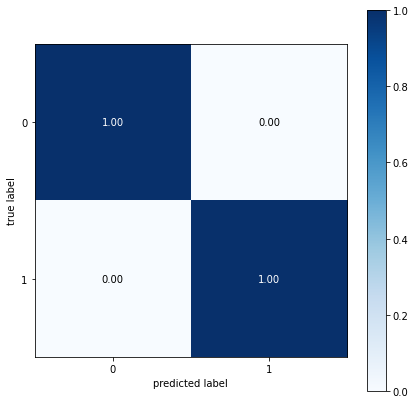

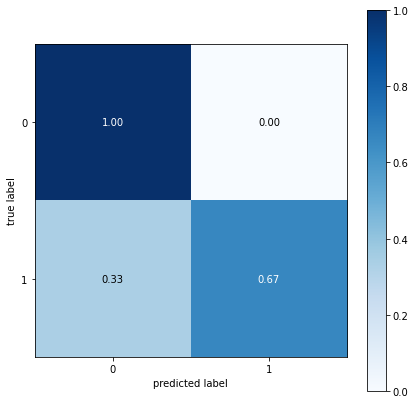

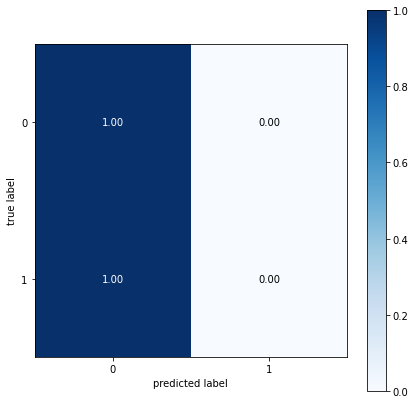

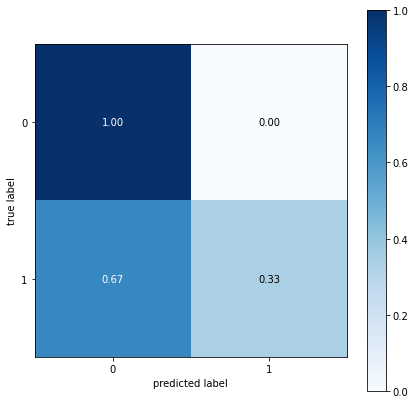

In [ ]:

NN = MLPClassifier(solver='adam', activation = 'relu', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


NN = MLPClassifier(solver='adam', activation = 'identity', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))



NN = MLPClassifier(solver='adam', activation = 'logistic', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


NN = MLPClassifier(solver='adam', activation = 'tanh', alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))

Accuracy: 14.2857%
Precision: 0.076923
Recall: 0.333333
F1 score: 0.125000
[[ 0 11]
 [ 1  2]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.15      0.67      0.25         3

    accuracy                           0.14        14
   macro avg       0.08      0.33      0.12        14
weighted avg       0.03      0.14      0.05        14

Accuracy: 78.5714%
Precision: 0.392857
Recall: 0.500000
F1 score: 0.440000
[[11  0]
 [ 3  0]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        11
         1.0       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.39      0.50      0.44        14
weighted avg       0.62      0.79      0.69        14



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: 

Accuracy: 78.5714%
Precision: 0.392857
Recall: 0.500000
F1 score: 0.440000
[[11  0]
 [ 3  0]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        11
         1.0       0.00      0.00      0.00         3

    accuracy                           0.79        14
   macro avg       0.39      0.50      0.44        14
weighted avg       0.62      0.79      0.69        14



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: 

(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f554f4cc550>)

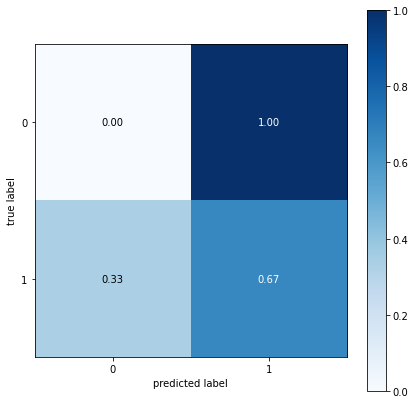

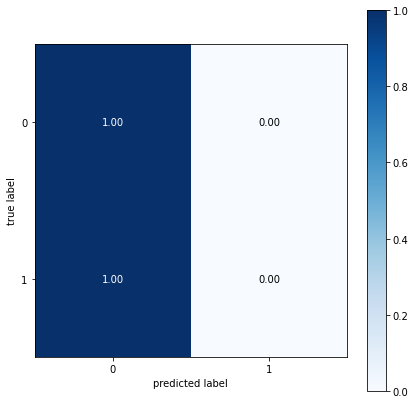

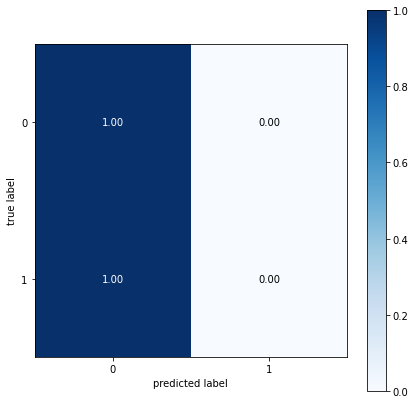

In [ ]:

NN = MLPClassifier(solver='sgd', activation = 'relu', learning_rate = 'constant' ,alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


NN = MLPClassifier(solver='sgd', activation = 'relu', learning_rate = 'invscaling' ,alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))



NN = MLPClassifier(solver='sgd', activation = 'relu', learning_rate = 'adaptive' ,alpha=1e-5, hidden_layer_sizes=(50, 50), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))